In [8]:

from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re

In [14]:
path = 'D:/CCFinder/Commit2So(A commit will correspond to multiple sos)/'
commit_list = os.listdir(path)
print(len(commit_list))
commit_list[:5]

21622


['D-CCFinder-NewData-AarogyaSetu-0-104.java.txt',
 'D-CCFinder-NewData-AarogyaSetu-0-185.java.txt',
 'D-CCFinder-NewData-AarogyaSetu-0-221.java.txt',
 'D-CCFinder-NewData-AarogyaSetu-0-233.java.txt',
 'D-CCFinder-NewData-AarogyaSetu-0-644.java.txt']

In [17]:
date_dict = dict()
for file in tqdm(commit_list):
    with open(path+file, 'r', encoding='utf-8') as f:
        line = f.readline()
        # year
        CreationDate = int(re.findall(r'CreationDate = (.*?)//',line)[0][:4])
        if CreationDate not in date_dict.keys():
            date_dict[CreationDate] = 1
        else:
            date_dict[CreationDate] += 1



100%|██████████| 21622/21622 [00:01<00:00, 18450.53it/s]


In [18]:
date_dict

{2018: 3702,
 2012: 1097,
 2016: 2836,
 2011: 546,
 2015: 2842,
 2017: 2589,
 2010: 339,
 2009: 101,
 2019: 1708,
 2013: 1935,
 2014: 2274,
 2020: 1600,
 2008: 53}

In [20]:
sum(date_dict[i] for i in date_dict.keys())

21622

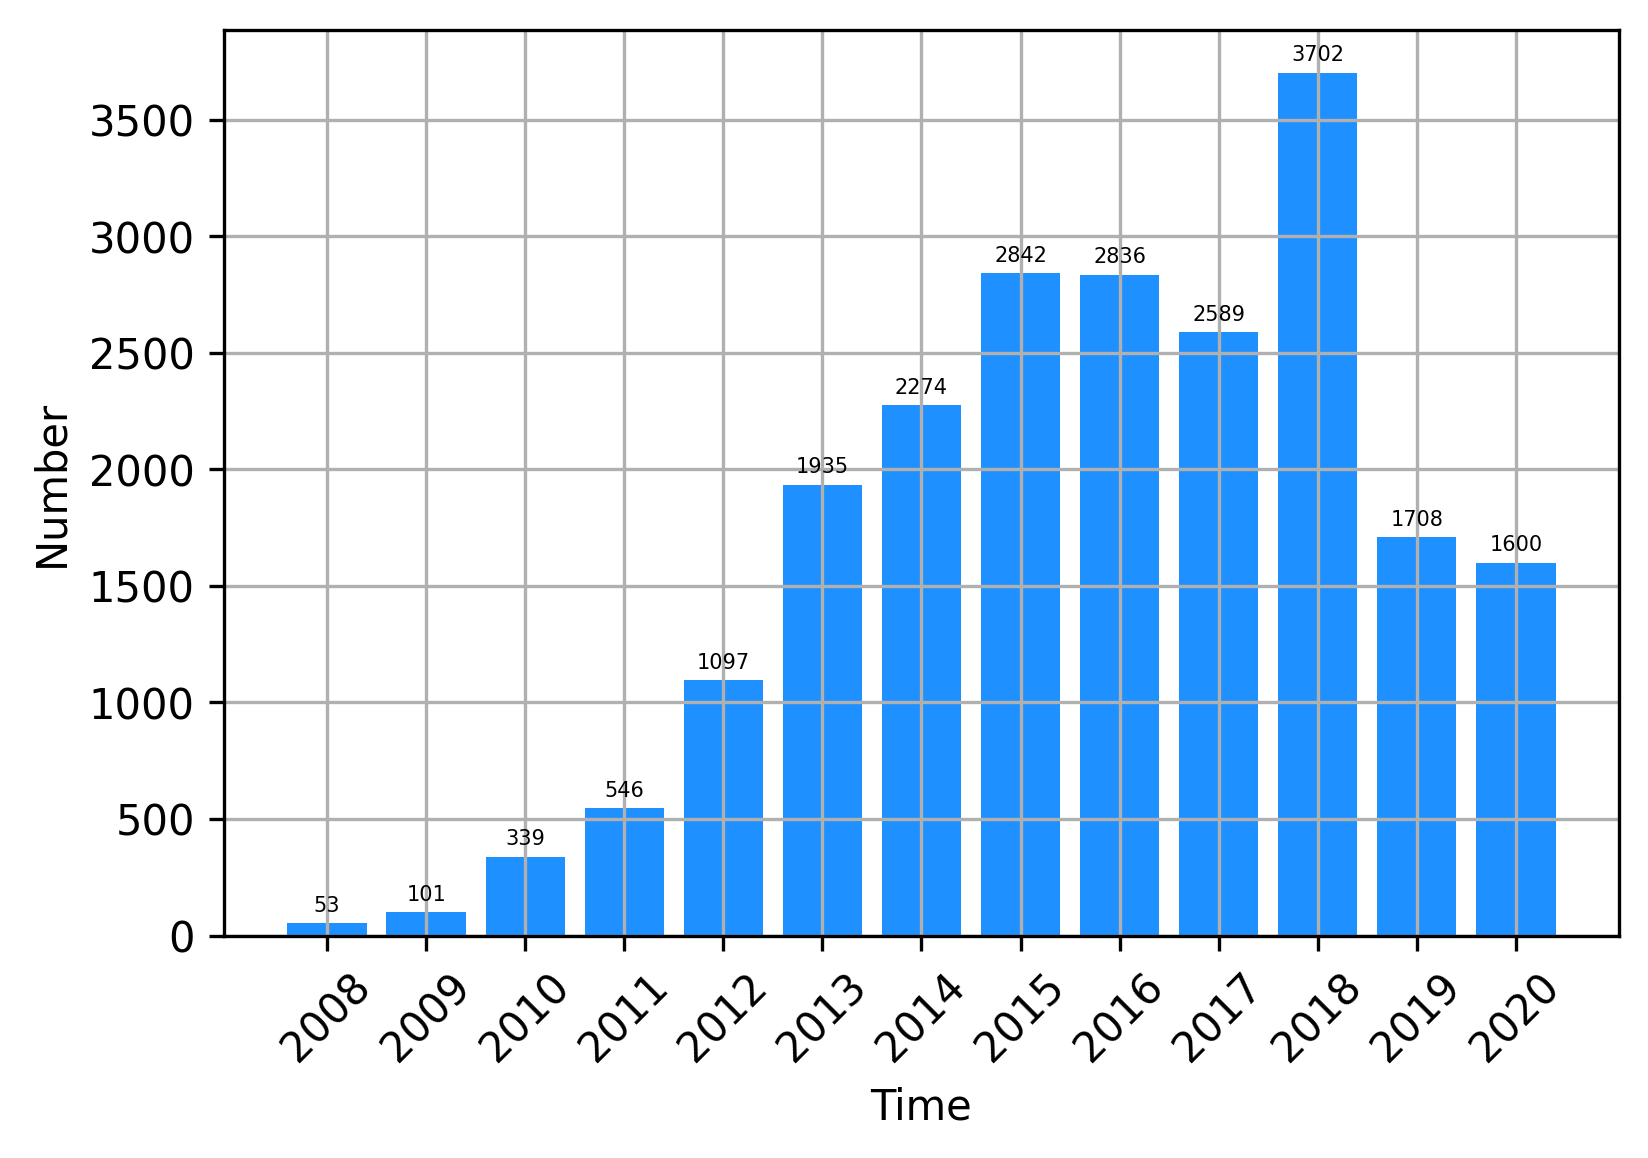

In [19]:
# data
import matplotlib.pyplot as plt
x = [i for i in range(len(date_dict))]
y = [date_dict[i] for i in range(2008, 2021)]
plt.figure(dpi=300)
# draw

plt.bar(x,y,align="center",color="#1E90FF",tick_label=[i for i in range(2008,2021)],alpha=1.0)
for a,b,i in zip(x,y,range(len(x))):
    plt.text(a,b+50,str(y[i]),ha='center',fontsize=5)
plt.xlabel("Time")
plt.ylabel("Number")
plt.xticks(rotation=45)
plt.grid()
plt.savefig('./pic/reuse_so_time_distribution.jpg')
